   


# **A1.3 Solución de problemas y selección de características**





En aplicaciones reales de ciencia de datos, rara vez se encuentran conjuntos preparados para utilizarse directamente en modelos predictivos. Presentándose en ocasiones escalas inconsistentes, valores atípicos y relaciones redundantes entre variables. Por lo cual, es esencial la selección adecuada de características que aporten información relevante para la predicción de una  variable de interés; paso fundamental para la construcción de modelos interpretables.

Asimismo, se hará uso de la base de datos  bajo el nombre ***“A1.3 Calificaciones.csv”***, presentándose información demográfica y académica de estudiantes de un curso, así como sus calificaciones parciales y finales.

De manera que, se buscará desarrollar un modelo de regresión lineal múltiple que permita predecir la calificación final. Analizando y enfrentando retos relacionados con el uso de datos reales y la adecuada selección de variables explicativas.

### ***Exploración y comprensión del conjunto de datos***

El presente estudio está enfocado en el análisis del rendimiento estudiantil de dos escuelas portuguesas, *"Gabriel Pereira" (GP)* y *"Mousinho da Silveira" (MS)* . Donde, mediante informes escolares y cuestionarios, se consideraron atributos que incluyen calificaciones estudiantiles, características demográficas, sociales y escolares. [1]

Proporcionándose conjuntos de datos relacionados con el rendimento de las asignaturas: *Matemáticas (MAT)* y *Lengua Portuguesa (POR)*, durante los tres periodos correspondientes al ciclo escolar. [1]



 Para dar inicio con el análisis técnico es necesario cargar los datos pertenecientes a ***“A1.3 Calificaciones.csv”***.

Para ello, una vez que el archivo se encuentre en la carpeta en uso; es esencial importar al ambiente de trabajo una librería de análisis de datos, utilizando la declaración `import` para acceder a las funciones de `pandas` mediante la abreviatura `pd`.

 De manera que, por medio de una variable de nombre `data` se hará uso de la función `read_csv()` de pandas, la cual nos permitirá realizar la lectura de datos.

In [ ]:
import pandas as pd
data =pd.read_csv('A1.3 Calificaciones.csv')

Igualmente, es necesario revisar el contenido del presente archivo. Mediante la función `print()` se aplicará la función `head()` en la variable `data`, desplegando por default las primeras cinco filas de datos.

In [ ]:
print(data.head())


  Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  G3
0      GP    F    18               2           0       no       6   5   6   6
1      GP    F    17               2           0      yes       4   5   5   6
2      GP    F    15               2           3      yes      10   7   8  10
3      GP    F    15               3           0      yes       2  15  14  15
4      GP    F    16               2           0       no       4   6  10  10


Tras analizar el contenido del archivo utilizado, podemos resaltar las variables presentes:

*  `Escuela` indica la escuela a la que pertenece el estudiante: *"Gabriel Pereira" (GP)* y *"Mousinho da Silveira" (MS)* .
*  `Sexo`  indica *F* para femenino y *M* para masculino.
*  `Edad`  indica la edad de los estudiantes en un rango de 15 a 22 años.
*  `HorasDeEstudio`  indica las horas de estudio del estudiaente:
      -  *1* representa menos de 2 horas.
      -  *2* representa de 2 a 5 horas.
      - *3* representa de 5 a 10 horas.
      -  *4* representa más de 10 horas.
*  `Reprobadas`  indica el número de materias reprobadas:
      -  *0* representa que no hay reprobación.
      -  *1*  representa que se ha reprobado una materia.
      - *2*  representa que se han reprobado dos materias.
      -  *4* representa tres o más materias reprobadas.
*  `Internet` indica si un estudiante tiene acceso a internet en casa: *yes* para los estudiantes con acceso y *no* para estudiantes que no tienen acceso.
*  `Faltas` indica el número de faltas de los estudiantes.
*  `G1` indica la calificación del primer periodo en una escala de 0 a 20.
*  `G2` indica la calificación del segundo periodo en una escala de 0 a 20.
*  `G3` indica la calificación del tercer periodo en una escala de 0 a 20.

De manera que, las variables pueden clasificarse en *cualitativas, cuantitativas y ordinales.*


Siendo *Escuela, Sexo e Internet* categorías cualitativas al representar un valor dentro de dos o más categorías o clases, veáse resultado a continuación nuevamente mediante `head()` en la variable `data`, desplegando filas de datos categóricos correspondientes a lo indicado. Determinandose que estas variables no pueden pertenecer directamente a un modelo lineal, por lo cual deben ser codificadas mediante variables dummy, es decir, variables numéricas binarias (0 o 1).



In [ ]:
print(data[['Escuela','Sexo','Internet']].head())

  Escuela Sexo Internet
0      GP    F       no
1      GP    F      yes
2      GP    F      yes
3      GP    F      yes
4      GP    F       no


Por su parte, *Edad, Faltas y las calificaciones G1, G2 y G3* se clasifican en variables cuantitativas, al expresar medidas continuas o discretas. Considerandose variables que pueden entrar correctamente en el modelo, tomando en cuenta las escalas y correlaciones de las mismas; vease resultado de función `head()` presentando los valores contables de acuerdo a su respectiva variable.

In [ ]:
print(data[['Edad','Faltas','G1','G2','G3']].head())

   Edad  Faltas  G1  G2  G3
0    18       6   5   6   6
1    17       4   5   5   6
2    15      10   7   8  10
3    15       2  15  14  15
4    16       4   6  10  10


Mientras que las variables *Reprobadas y Horas de estudio* corresponden a variables ordinales al clasificarse en valores numéricos (0,1,2,4) agrupando en orden creciente rangos cantidad de reprobación, véase  resultado a continuación  mediante `value_counts()`, mostrándose el conteo entre los rangos que representan una categoría.

Sin embargo, es necesario el análisis y estudio de datos en el caso de la variable *Reprobadas*, al presentarse un valor *3* en lugar del *4* descrito en la documentación ***UC Irvine Machine Learning Repository*** de la cual provienen los datos.[1]    Evidenciando una diferencia importante, la cual debe considerarse  en la preparación y limpieza de datos.

In [ ]:

print(data['Reprobadas'].value_counts())
print(data['HorasDeEstudio'].value_counts())

Reprobadas
0    312
1     50
2     17
3     16
Name: count, dtype: int64
HorasDeEstudio
2    198
1    105
3     65
4     27
Name: count, dtype: int64


Por su parte, es podemos considerar la calificación final (G3) como variable dependiente, siendo posible considerar variables como *Edad, HorasDeEstudio, Faltas* en las predicciones dentro del modelo, bajo un contexto ampliado brindado por variables como *Escuela, Sexo, Reprobadas e Internet*.

Asimismo, desde el primer vistazo es posible suponer una relación entre un mayor número de horas de estudio y calificaciones más altas, mientras que un incremento en las materias reprobadas parece asociarse con notas más bajas, véase resultados a manera comparativa a continuación.

*Esta observación inicial se considerará para un análisis más detallado en etapas posteriores.*

In [ ]:
print(data[['HorasDeEstudio','Reprobadas','G3']].head())



   HorasDeEstudio  Reprobadas  G3
0               2           0   6
1               2           0   6
2               2           3  10
3               3           0  15
4               2           0  10


### ***Preparación y limpieza de los datos***




En esta sección se espera realizar las transformaciones necesarias para que el conjunto de datos sea adecuado para un modelo de regresión lineal múltiple.

Primeramente, se analizarán las variables cualitativas, `Sexo` e `Internet`buscando transformarlas en una variable dummy, es decir, se le asignará un valor entre 1 o 0 para indicar la presencia o ausencia de una condición, permitiéndonos llevar a cabo la regresión esperada.

Para ello, se utilizará la función `pd.get_dummies()` perteneciente a la librería pandas para dicha transformación. Usando `drop_first=True` para generar variables dummy que toman valores booleanos (True/False), convirtiéndolos en enteros (0/1) con ayuda de la función `astype(int)`.

In [ ]:
# Dummies
data = pd.get_dummies(data, columns=['Sexo','Internet'], drop_first=True)

# Columnas dummy a binario (0/1)
cols_dummies = ['Sexo_M', 'Internet_yes']   # ajusta según los nombres que aparezcan
data[cols_dummies] = data[cols_dummies].astype(int)

# Impresión de DataFrame
print(data.head())



  Escuela  Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Sexo_M  \
0      GP    18               2           0       6   5   6   6       0   
1      GP    17               2           0       4   5   5   6       0   
2      GP    15               2           3      10   7   8  10       0   
3      GP    15               3           0       2  15  14  15       0   
4      GP    16               2           0       4   6  10  10       0   

   Internet_yes  
0             0  
1             1  
2             1  
3             1  
4             0  


Así, es posible analizar las variables previamente transformadas:

 *  `Sexo_M` indica el sexo del estudiante:

      -  *1*  representa a los estudiantes de sexo masculino.
      - *0*  representa a los estudiantes de sexo femenino.     
      
*  `Internet_yes` indica si el estudiante cuenta con acceso a internet en su hogar:

      -  *1*  representa a los estudiantes con acceso a internet.
      - *0*  representa a los estudiantes que NO cuentan con acceso a internet.   

Permitiendo así que dichas variables categóricas puedan ser utilizadas en un modelo de regresión lineal.


En el conjunto de datos pueden presentarse valores atípicos (outliers), pueden sesgar tanto los modelos estadísticos como los procesos de estandarización que se apliquen posteriormente.  Por ello, revisaremos las variables cuantitativas *Edad, Faltas, G1, G2 y G3*, mediante un análisis descriptivo utilizando la función `describe()`.


In [ ]:
print(data[['Edad','Faltas','G1','G2','G3']].describe())

             Edad      Faltas          G1          G2          G3
count  395.000000  395.000000  395.000000  395.000000  395.000000
mean    16.696203    5.708861   10.908861   10.713924   10.415190
std      1.276043    8.003096    3.319195    3.761505    4.581443
min     15.000000    0.000000    3.000000    0.000000    0.000000
25%     16.000000    0.000000    8.000000    9.000000    8.000000
50%     17.000000    4.000000   11.000000   11.000000   11.000000
75%     18.000000    8.000000   13.000000   13.000000   14.000000
max     22.000000   75.000000   19.000000   19.000000   20.000000


Con el análisis antes realizados podemos observar ampliamente posibles datos atípicos.

En el caso de la variable `Edad` se mantiene en un rango de 15 a 22 años. Donde, la mayoría de los estudiantes tienen alrededor de 16 y 18 años; mientras que el valor máximo es de 22 años, lo cual podría considerarse un outlier leve.

En cuanto a la variable `Faltas` se maneja un promedio de 5.7 con una desviación estándar muy grande (8.0). Observándose que la mayoría de los estudiantes cuentan con faltas que van de 0 a 8 aproximadamente; sin embargo, existen casos extremos que van más allá de 20 faltas, llegando a un valor máximo de 75. Siendo definitivamente un outlier que puede sesgar el análisis.

Por último, en el caso de las variables `G1, G2 y G3` se manejan promedios que van de 10 a 11 puntos, con una desviación estándar de aproximadamente 3.3 a 4.6, indicando una variabilidad moderada. Donde, los rangos en *G1* van de 3 a 19 puntos; en *G2* van de 0 a 19 puntos y *G3* van de 0 a 20 puntos; con mayor concentración en 8 y 14 puntos. Considerando que los valores muy bajos (0 y 3) pueden ser outliers que representen casos atípicos como lo puede ser una ausencia o algo similar.

Para identificar con mayor precisión aquellos datos atípicos se utilizará el *Método de Tukey*, el cual utiliza el rango intercuartil para filtrar números muy grandes o muy pequeños. Utilizando las siguientes fórmulas para ello: [2]

* Valores atípicos bajos = $Q1 – 1,5 (Q3 – Q1) = Q1 – 1,5 (IQR)$



* Valores atípicos altos = $Q3 + 1,5(Q3 – Q1) = Q3 + 1,5(IQR) $

Los valores que se encuentran por debajo de Q1 – 1.5·IQR o por encima de Q3 + 1.5·IQR se consideran atípicos (outliers). [2]

Este procedimiento se realizará calculando los cuartiles (0.25 y 0.75) con `quantile()`, obteniendo el IQR y estableciendo los límites inferior y superior. Para posteriormente filtrar las observaciones fuera de los límites establecidos.


In [ ]:
cols = ['Edad','Faltas','G1','G2','G3']

for col in cols:
    # Cuartiles
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    # Rango intercuartil
    IQR = Q3 - Q1

    # Límites
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filtrar valores
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]

    # Resultados
    print(f"Outliers en {col}:")
    print(outliers.values)



Outliers en Edad:
[22]
Outliers en Faltas:
[25 54 26 56 24 28 22 21 75 22 30 38 22 40 23]
Outliers en G1:
[]
Outliers en G2:
[0 0 0 0 0 0 0 0 0 0 0 0 0]
Outliers en G3:
[]


Tras el análisis con el método Tukey podemos observar lo siguiente:

*  `Edad`: cuenta con un caso único (22 años) que se encuentra fuera del rango común de edades.
*  `Faltas`: se identificaron múltiples casos donde se presentan más de 20 ausencias, mostrándose un patrón muy distinto al común de 0 a 8 faltas.
*  `G2`: se identificaron varios puntajes de cero, en el cual es posible correspondan a ausencias durante exámenes, en lugar de calificaciones precisas.
*  `G1 y G3`: no presentan outliers de acuerdo a este método.

Para analizar el outlier de la variable ***Edad***, consideremos que el rango normal de edad varía entre 15 y 21. Donde, según el límite definido por el método de Tukey, el caso atípico de 22 años podría sesgar estandarizaciones. Por lo cual, se optará por imputarlo con la mediana, manteniendo así la coherencia en los datos, sin eliminar observaciones; para ello se utilizará la función `median()` para obtener la mediana y `data.loc []` para actualizar el DataSet con el que estamos trabajando.

In [ ]:
# Mediana de Edad
mediana_edad = data['Edad'].median()

# Reemplazo de outlier
data.loc[data['Edad'] > 21, 'Edad'] = mediana_edad


En cuanto al outlier de la variable ***Faltas*** consideramos que la mayoría de los estudiantes cuenta 0 a 8 faltas; mientras que, el método Tukey identificó como outlier los valores mayores a 20 años (20 25 54 26 56 24 28 22 21 75 22 30 38 22 40 23). Siendo valores que se apartan significativamente del patrón central y pueden sesgar los análisis posteriores.

Por ello, se utilizará el método de *Imputación por mediana* debido a que este no se ve afectado por valores extremos, corrigiéndolos por un valor típico dentro del grupo. Mientras que, métodos como KNN consideran los outliers como válidos y los mantienen, lo que en este caso no es deseable.

Haciendo uso de la función `median()` para obtener la mediana y `data.loc []` para actualizar el dataset con el que estamos trabajando. Además de imprimir un resumen estadístico con `describe()`  para revisar la nueva distribución.

In [ ]:
# Mediana de Faltas
mediana_faltas = data['Faltas'].median()

# Reemplazo de outliers
data.loc[data['Faltas'] > 20, 'Faltas'] = mediana_faltas

# Nueva distribución
print(data['Faltas'].describe())

count    395.000000
mean       4.579747
std        4.874110
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: Faltas, dtype: float64


Así, después de la corrección se muestra un promedio de 4.6 y una desviación estándar de 4.9, viéndose una dispersión moderada. El rango va de 0 a 20 faltas, con una mediana en 4, lo que refleja una distribución más estable tras eliminar los valores atípicos.

Con respecto a la variable ***G2***, se presentan calificaciones de cero, que el método consideró como atípico. Pues, al presentarse un rango normal entre 3 y 19, los ceros podrían representar contextos distintos a una calificación precisa.

Por lo cual, de igual forma se utilizará la *Imputación por mediana*, debido a que este representa el centro de distribución de calificaciones y no daría por válidos valores que distorsiones el análisis. Donde, con las funciones mencionadas anteriormente, será posible revisar la nueva distribución.

In [ ]:
# Mediana de G2
mediana_g2 = data['G2'].median()

# Reemplazo de outliers
data.loc[data['G2'] == 0, 'G2'] = mediana_g2

# Nueva distribución
print(data['G2'].describe())

count    395.000000
mean      11.075949
std        3.198874
min        4.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64


Tras el reemplazo realizado, se observa que la variable *G2* muestra un promedio de 11.1. De manera que, los valores se concentran entre 9 y 13 puntos, con una mediana de 11 y un rango de 4 a 19, reflejando una distribución coherente con el desempeño típico de los estudiantes.

No obstante, después de realizar las correcciones, se observa que las variables presentan rangos  diferentes entre sí.

*  `Edad` cuenta con rangos que varían de 15 a 21 años.
*  `Faltas` cuenta con rangos que van desde 0 a 20 faltas.
*  `G1, G2 y G3` se maneja con una escala que va de 0 a 20.

Estas diferencias pueden generar sesgos en los modelos de regresión, ya que es posible que las variables que cuenten con los valores más grandes dominen el cálculo de coeficientes, aun cuando no necesariamente sean variables con mayor influencia en el punto de análisis.

Por lo cual, para evitar lo antes mencionado, se utilizará función `StandartScaler` perteneciente a la librería `Scikit-learn` la cual transforma las variables para que cuenten con una media de cero y desviación estándar de uno. Esta transformación se aplica mediante el método `fit_transform`, que primero calcula la media y desviación estándar de cada variable y posteriormente las convierte utilizando la siguiente fórmula:[3]

$$\Large z = \frac{x - \mu}{\sigma}$$

Donde, $x$ es el valor original, $u$ la media de la variable y $s$  su desviación estándar.

Logrando así, evitar que las diferencias de escala entre características dominen el modelo. No obstante, es importante destacar que dicha función es sensible a valores atípicos, y sus características pueden escalarse de forma diferente en su presencia. Por lo cual, es pertinente analizar previamente estos casos, como se llevó a cabo anteriormente.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

cols = ['Edad','Faltas','G1','G2','G3']

# StandardScaler
est = StandardScaler()

# Ajustar datos
data[cols] = est.fit_transform(data[cols])

# Nuevos datos estandarizados (primeras cinco filas)
print(data[cols].head())


       Edad    Faltas        G1        G2        G3
0  1.056374  0.291757 -1.782467 -1.588805 -0.964934
1  0.253936 -0.119095 -1.782467 -1.901811 -0.964934
2 -1.350940  1.113460 -1.179147 -0.962792 -0.090739
3 -1.350940 -0.529947  1.234133  0.915247  1.002004
4 -0.548502 -0.119095 -1.480807 -0.336779 -0.090739


Una vez con las variables estandarizadas, podemos realizar el modelo de regresión. Pero, antes de ello, es importante tomar en cuenta a las variables ordinales ***Reprobadas y Horas de estudio***.

Para `Reprobadas`, se corregirán los registros con valor 3, recodificándolos como 4, siguiendo la convención del dataset original, donde los valores 1 y 2 representan el número exacto de materias reprobadas, mientras que 4 agrupa los casos de tres o más; para ello se utilizará la función `replace()`. Manteniéndolas en su escala original para mantener la jerarquía establecida en sus categorías.


In [ ]:

data['Reprobadas'] = data['Reprobadas'].replace(3, 4)

En cuanto a `HorasDeEstudio` se recodificará en variables dummy para capturar diferencias no lineales entre categorías. El grupo de referencia serán los estudiantes que estudian menos de 2 horas, para así obtener las siguientes variables:

`Horas_2` :
- Valor = 1 si el estudiante estudia entre 2 y 5 horas.
- Valor = 0 en cualquier otro caso.

`Horas_3` :
- Valor = 1 si el estudiante estudia entre 5 y 10 horas.
- Valor = 0 en cualquier otro caso.

`Horas_4` :
- Valor = 1 si el estudiante estudia más de 10 horas.
- Valor = 0 en cualquier otro caso.

Utilizando  la función pd.`get_dummies()` para convertir la variable *HorasDeEstudio* en nuevas columnas que representan cada categoría de horas de estudio. Después, con `pd.concat()` unimos estas columnas al dataset original y con `sm.OLS()` ajustamos el modelo de regresión múltiple.






In [ ]:
import pandas as pd
import statsmodels.api as sm

dummies_horas = pd.get_dummies(data['HorasDeEstudio'], prefix='Horas', drop_first=True).astype(int)

# Nueva distribución
data = pd.concat([data, dummies_horas], axis=1)



Asimismo, tras el proceso de preparación, las variables numéricas (Edad, Faltas, G1, G2 y G3) fueron estandarizadas, garantizando así la comparabilidad entre ellas.

 Las variables categóricas como Sexo e Internet se transformaron en dummies, permitiendo su uso en modelos estadísticos sin perder información.

 Finalmente, la variable ordinal HorasDeEstudio se transformó en dummy, formando 3 variables nuevas. Mientras que Reprobadas se mantuvo en su escala original, corrigiendo los casos de valor 3 en Reprobadas y recodificándolos como 4, de acuerdo con la convención de el dataset original.

 De esta manera, el conjunto de datos está preparado coherentemente y listo para el análisis posterior.


### ***Análisis de relaciones entre variables***




En esta sección se analizarán las relaciones entre las variables explicativas con el propósito de identificar posibles problemas de colinealidad o redundancia de información. Siendo esencial para garantizar que el modelo sea entrenado con variables que brinden un valor independiente, evitando sesgos debido a información duplicada.

Para ello, en cuanto a las variables cuantitativas *(Edad, Faltas, G1, G2 y G3)* se utilizará el *Coeficiente de Correlación de Pearson*, dado que las variables consideradas son numéricas y se busca identificar relaciones lineales que puedan generar colinealidad.

Este coeficiente mide la dirección de la relación lineal entre dos variables continuas, con valores que oscilan entre -1 y +1. [4]

Un valor cercano a 1 indica una correlación positiva fuerte, mientras que uno cercano a -1 refleja una correlación negativa fuerte; valores próximos a 0 sugieren ausencia de relación lineal. [4]

Cabe destacar que, que Pearson identifica relaciones lineales, por lo que, en caso de que los datos cuenten con una tendencia no lineal, el coeficiente puede parecer bajo aun cuando exista una asociación significativa. [4]



De manera que, se seleccionarán las variables numéricas con la función `data.[nums_vars].corr()` representándose en un mapa de calor mediante `sns.heatmap`. Agregando detalles al gráfico con  `plt.figure` y  `plt.title`, para finalmente mostrarse con  `plt.show()`.

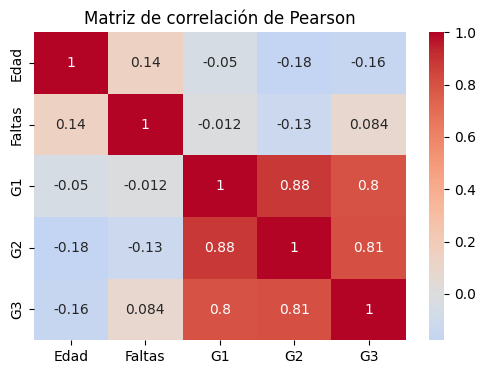

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


num_vars = ['Edad','Faltas','G1','G2','G3']

# Matriz de correlación
corr = data[num_vars].corr()

# Gráfico
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de Pearson')
plt.show()

Tras analizar la matriz de correlación antes mostrada, podemos determinar que las calificaciones *(G1, G2, G3)* están altamente relacionadas entre sí, con coeficientes de 0.80 entre G1 y G3; de 0.81 entre G2 y G3; además de 0.88 entre G1 y G2.

Esto evidencia una gran influencia de las calificaciones previas sobre la nota final, lo cual podría incrementar notablemente la capacidad explicativa de un modelo si se incluyen todas. Sin embargo, también puede generar problemas de colinealidad, por lo que resulta interesante conservar únicamente G3 como variable dependiente y analizar los factores externos sin incorporar G1 y G2.


En cuanto a *Edad y Faltas*, no muestran correlaciones fuertes, aportando así información independiente.



En cuanto a las variables cualitativas, *Sexo e Internet*, no se espera una relación evidente entre dichas variables. No obstante, para confirmar que no existe asociación estadísticamente significativa se realizará una prueba *Chi-cuadrado*.

El test Chi‑cuadrado es una prueba estadística para datos categóricos que permite evaluar si dos variables cualitativas están relacionadas o si son independientes, calculándose mediante la siguiente fórmula: [5]

$\chi^2 = \sum \frac{(O-E)^2}{E}$


 Donde, $O$ son las frecuencias observadas y $E$ las esperadas. De manera que, si el p‑valor ≥ 0.05, no hay evidencia de asociación.


Para ello se utilizarán las funciones `pd.crosstab` para la tabla de contingencia y posteriormente la prueba Chi-cuadrado `chi2_contingency` de la librería `spicy.stats`.



In [ ]:
import pandas as pd
import scipy.stats as stats

# Sexo vs Internet
tabla = pd.crosstab(data['Sexo_M'], data['Internet_yes'])
chi2, p, dof, expected = stats.chi2_contingency(tabla)

print("p-valor:", p)

if p < 0.05:
    print("Las variables NO son independientes (hay asociación).")
else:
    print("Las variables son independientes.")

p-valor: 0.45829247086513125
Las variables son independientes.


Se confirma estadísticamente, mediante un p‑valor mayor a 0.05, que no existe evidencia de asociación entre las variables, por lo que pueden considerarse independientes.


En cuanto a la variable *Escuela* , se realizó una prueba t de Student usando la función `ttest_ind()` de la librería `scipy.stats`, con el fin de comparar las calificaciones finales entre los estudiantes de las dos escuelas (GP y MS) y analizar si existen diferencias relevantes. .


In [ ]:
from scipy.stats import ttest_ind

gp = data[data["Escuela"]=="GP"]["G3"]
ms = data[data["Escuela"]=="MS"]["G3"]

ttest_ind(gp, ms)


TtestResult(statistic=np.float64(0.8933317649161894), pvalue=np.float64(0.37222623713114755), df=np.float64(393.0))

El resultado arrojó un valor p de 0.37, lo que indica que no existen diferencias estadísticamente significativas entre ambas poblaciones. Por ello, se optó por descartarla y concentrarse en las variables con mayor poder explicativo. De manera que puede decirse que el modelo representa de manera general a la población utilizando datos provenientes de ambas escuelas, lo que asegura que la información esté integrada sin necesidad de diferenciarlas explícitamente. En un futuro, sería posible analizar un modelo por escuela para comparar si existen diferencias significativas en el desempeño académico según el contexto escolar.

Por último, para analizar la relación entre las variables *Horas_2, Horas_3 y Horas_4 *(categorías derivadas de la variable original Horas de Estudio)  y Reprobadas* se utilizará la *Correlación de Spearman* la cual mide la fuerza y la dirección de la asociación entre dos variables clasificadas, específicamente ordinales o continuas transformadas en rangos; utilizando la siguiente fórmula: [6]

 $$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

 Donde, $n$ es el número de observaciones y $d$ son las diferencias entre los rangos correspondientes de cada observación. De manera que, si el p‑valor ≥ 0.05, no hay evidencia de asociación.


Para ello se utilizará la función `spicy.stats.spearman()` para calcular la correlación de Spearman perteneciente a la librería `spicy.stats`.





In [ ]:
import scipy.stats as stats

for col in ['Horas_2','Horas_3','Horas_4']:
    rho, p = stats.spearmanr(data[col], data['Reprobadas'])
    print(f"{col} -> Coeficiente de Spearman: {rho:.3f}, p-valor: {p:.3f}")
    if p < 0.05:
        print("Existe asociación significativa.")
    else:
        print("No se encontró asociación significativa.")

Tras lo antes observado, podemos determinar que las categorías *Horas_2 y Horas_3* no muestran asociación significativa con el número de asignaturas reprobadas. Sin embargo, la categoría Horas_4 (más de 10 horas de estudio) presenta un coeficiente de Spearman de –0.116 con un p‑valor de 0.021, lo que indica una relación débil pero estadísticamente significativa. Esto indica cierta tendencia: los estudiantes que dedican más de 10 horas al estudio tienden a reprobar menos materias.


En la sección de relación entre variables se observó que las calificaciones *(G1, G2, G3)* presentan una fuerte correlación entre sí, mientras que las variables cuantitativas como *Edad y Faltas* resultaron independientes. Las cualitativas como *Sexo e Internet* no mostraron asociación relevante. En cuanto a la variable Escuela, se determinó que no existen diferencias significativas entre las dos instituciones, por lo que se optó por descartarla y concentrarse en las variables con mayor poder explicativo. Finalmente, las ordinales como *Reprobadas y las nuevas variables de Horas de Estudio* reflejaron vínculos débiles, aunque en algunos casos significativos, lo que sugiere posibles efectos a considerar en análisis posteriores.


### ***Selección de características***

En modelos de regresión lineal múltiple, no todas las variables contribuyen de manera relevante al resultado. Donde, al incluir demasiadas variables se puede general colinealidad y dificultar interpretación. Por lo cual, se utilizarán métodos de selección de características que ayudan a simplificar el modelo y hacer énfasis en los factores más importantes.

*El método de eliminación hacia atrás (Backward Elimination)* es una técnica de selección de variables, que comienza con un modelo completo (todas las variables incluidas) y elimina de manera iterativa aquellas que no son estadísticamente significativas. [7]

Para ello se siguen los siguientes pasos: [7]

1.  Definir un nivel de significancia (p-value < 0.05).
2. Ajustar el modelo con todas las variables.
3. Identificar la variable con el mayor p‑value. Si ese p‑value es mayor al nivel de significancia, se elimina la variable.
4.  Recalcular el modelo y repetir el proceso hasta que todas las variables restantes tengan p‑values menores al nivel de significancia.

Asegurando que el modelo final conserve únicamente las variables con evidencia estadística.




Para el análisis del estudio contamos con múltiples variables que podrían influir en el rendimiento académico. Sin embargo, sabemos que algunas de ellas, como G1 y G2, presentan una correlación muy importante con la variable dependiente (G3). Por esta razón se considerarán dos modelos distintos.

El código que se utilizará para ello, utiliza la librería  `statsmodels` para ajustar el modelo de regresión lineal múltiple con la variable dependiente G3.

 Primeramente, se definirán todas las variables explicativas, tomando en cuenta la constante con la función `sm.add_constant` para incluir él intercepto. Luego, con `sm.OLS(y, X).fit()` se estimará el modelo, obteniendo métricas R² y p‑values.

  Así, a través de un ciclo `while`, se identificará la variable con el mayor p‑value usando `pvalues.idxmax()`.Donde, si supera el nivel de significancia de 0.05, se elimina de la lista con `variables.remove()`.
  
   El proceso será repetido hasta que solo permanezcan las variables significativas, definiendo al final el conjunto de características seleccionadas.




***Modelo 1:***

- Incluye las calificaciones previas (G1 y G2), además del resto de las variables.
- Se espera que el porcentaje explicativo ($R^2$) sea alto, ya que estas notas se correlacionan fuertemente con G3.


In [ ]:
import statsmodels.api as sm

y = data['G3']

# Variables consideradas
variables = ['Reprobadas','Edad','Faltas','Sexo_M',
             'Horas_2','Horas_3','Horas_4','Internet_yes',
             'G1','G2']

while True:
    X = sm.add_constant(data[variables])
    modelo = sm.OLS(y, X).fit()
    print("\nVariables:", variables)
    print("R²:", round(modelo.rsquared, 3))
    print("p-values:\n", modelo.pvalues)

    # Condiciones para eliminar variable con mayor p-value
    pvals = modelo.pvalues.drop('const')
    peor_var = pvals.idxmax()
    if pvals[peor_var] > 0.05:
        variables.remove(peor_var)
        print(f"Eliminada: {peor_var}")
    else:
        break

print("\nModelo final:")
print(variables)


Tras el análsis antes presentados, se observa que al aplicar la eliminación hacia atrás, el modelo terminó por quedarse con las variables *Reprobadas, Edad, Faltas, G1 y G2.*

Donde, el $R^2$ se mantuvo estable en torno a 0.717 a 0.718, correspondiendo a una capacidad explicativa en torno al 71.8%. Demostrando que al eliminar variables como Horas, Internet y Sexo no se vio afectada la capacidad explicativa, manteniendo las variables con p-values menores a 0.05.

Cabe destacar que, G1 y G2 son las características más fuertes, por lo cual el modelo final, si bien, conserva las variables con mayor poder explicativo, no considera a los factores como Sexo, Internet o las Horas de Estudio, ya que sus valores de significancia fueron altos y no aportaron evidencia estadística suficiente.

Esto implica que el rendimiento académico en G3 se explica principalmente por el desempeño previo y algunos factores adicionales como Reprobadas, Edad y Faltas



***Modelo 2:***

- Excluye las calificaciones previas (G1 y G2), analizando el resto de las variables.
- El modelo permite analizar qué factores contextuales influyen en el rendimiento académico más allá del desempeño previo del estudiante.


In [ ]:
import statsmodels.api as sm

y = data['G3']

# Variables consideradas
variables = ['Reprobadas','Edad','Faltas','Sexo_M',
             'Horas_2','Horas_3','Horas_4','Internet_yes']

while True:
    X = sm.add_constant(data[variables])
    modelo = sm.OLS(y, X).fit()
    print("\nVariables:", variables)
    print("R²:", round(modelo.rsquared, 3))
    print("p-values:\n", modelo.pvalues)

    # Condiciones para eliminar variable con mayor p-value
    pvals = modelo.pvalues.drop('const')
    peor_var = pvals.idxmax()
    if pvals[peor_var] > 0.05:
        variables.remove(peor_var)
        print(f"Eliminada: {peor_var}")
    else:
        break

print("\nModelo final:")
print(variables)

Con base en los resultados obtenidos, se observa que al aplicar la eliminación hacia atrás el modelo conservó las variables *Reprobadas, Edad, Faltas, Sexo_M y Horas_3.*

 El valor de $R^2$ se mantuvo estable alrededor de 0.169 a 0.172, lo que corresponde a una capacidad explicativa cercana al 17%. Demostrando que, al eliminar variables como Horas_2, Horas_4 e Internet_yes, el modelo no se vio afectado, ya que dichas variables presentaban p‑values elevados y no aportaban la evidencia estadística esperada.


Es importante resaltar que, la capacidad explicativa de este modelo es considerablemente menor al obtenido en el anterior, lo cual se debe a la alta correlación que tienen G1 y G2 con G3, al punto de considerarse colineales hasta cierto punto. Sin embargo, este modelo analiza el efecto de factores contextuales sobre el rendimiento académico como Reprobadas, Edad, Faltas, Sexo y Horas de estudio, aportando información independiente más allá del desempeño previo.



### ***Entrenamiento y evaluación del modelo***

En esta etapa del análisis se procede a la construcción de un modelo de regresión lineal múltiple utilizando únicamente las variables seleccionadas en el proceso de eliminación hacia atrás. Buscando evaluar el desempeño del modelo tanto en datos de entrenamiento como en datos de prueba.

De manera que, es importante aclarar que el modelo no se entrena con todos los datos a la vez, sino que utiliza un conjunto de datos para entrenamiento (70%) y otro en prueba (30%). [8]

El *entrenamiento* se utiliza para ajustar el modelo, aprendiendo la relación entre las variables independientes y la independiente. Mientras que la *prueba* se reserva para evaluar finalmente que tan bien el modelo generaliza nuevos datos. [8]

De manera que, para la separación se dividirá el conjunto de datos en entrenamiento (70%) y prueba (30%), utilizando la función  `train_test_split` del módulo `sklearn.model_selection`, buscando así evitar la fuga de datos asegurando que las variables de prueba no se usaran en el entrenamiento. [9]

Aplicándose primeramente en el *Modelo 1* para las variables `Reprobadas, Edad, Faltas, G1, G2` como se observa a continuación:




In [ ]:
from sklearn.model_selection import train_test_split


X = data[['Reprobadas','Edad','Faltas','G1','G2']]
y = data['G3']

# 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Aplicándose de la misma forma en el *Modelo 2* para las variables `Reprobadas, Edad, Faltas, Sexo_M y Horas_3` como se observa a continuación:

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Reprobadas','Edad','Faltas','Sexo_M','Horas_3']]
y = data['G3']

# 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


Ahora bien, una vez separados los conjuntos de entrenamiento y prueba, es posible entrenar ambos modelos.

 El *Modelo 1* incluyendo las variables *Reprobadas, Edad, Faltas, G1 y G2,* mientras que el *Modelo 2* en las características *Reprobadas, Edad, Faltas, Sexo_M y Horas_3*.

Donde, para llevar a cabo el entrenamiento se utilizó `LinearRegression` de `sklearn.linear_model`, ajustando el modelo con `.fit(X_train, y_train)` y generando predicciones con `predict()`. Evaluando el desempeño con `r2_score` y el `Residual Standard Error` (RSE), midiéndose la desviación estándar de los residuos, cuantificando así el error promedio de predicción. [10]





**Modelo 1**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Función RSE
def rse(y_true, y_pred):
    residuos = y_true - y_pred
    return np.sqrt(np.mean(residuos**2))

y = data['G3']

# Modelo 1

X1 = data[['Reprobadas','Edad','Faltas','G1','G2']]
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

modelo1 = LinearRegression()
modelo1.fit(X1_train, y_train)

print("Modelo 1")
print("R² entrenado:", r2_score(y_train, modelo1.predict(X1_train)))
print("R² prueba:", r2_score(y_test, modelo1.predict(X1_test)))
print("RSE entrenado:", rse(y_train, modelo1.predict(X1_train)))
print("RSE prueba:", rse(y_test, modelo1.predict(X1_test)))



De manera que, tras entrenar y poner a prueba los datos del *Modelo 1*  se observa que el coeficiente de capacidad explicativa obtiene un valor de 0.705 en entrenamiento y 0.739 en prueba, indicando que explica aproximadamente del 70–74% de la variabilidad de la calificación final.

 Mientras que, los valores del RSE son similares (0.537 en entrenamiento y 0.523 en prueba), lo que refleja un error promedio bajo y constante, sugiriendo que el modelo mantiene un buen desempeño cuando se enfrenta a datos nuevos o desconocidos



**Modelo 2**

In [ ]:

# Modelo 2

X2 = data[['Reprobadas','Edad','Faltas','Sexo_M','Horas_3']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

modelo2 = LinearRegression()
modelo2.fit(X2_train, y_train)

print("Modelo 2")
print("R² entrenado:", r2_score(y_train, modelo2.predict(X2_train)))
print("R² prueba:", r2_score(y_test, modelo2.predict(X2_test)))
print("RSE entrenado:", rse(y_train, modelo2.predict(X2_train)))
print("RSE prueba:", rse(y_test, modelo2.predict(X2_test)))

Por su parte, tras entrenar y poner a prueba los datos del *Modelo 2*, se observa que el coeficiente de capacidad explicativa obtiene un valor de 0.166 en entrenamiento y 0.146 en prueba, indicando que explica alrededor del 14–17% de la variabilidad.

 Por su parte, los valores del RSE son altos y similares (0.903 en entrenamiento y 0.947 en prueba), lo que refleja un error promedio considerable y constante, sugiriendo que este modelo predice de manera limitada frente a datos nuevos o desconocidos.


Posteriormente, graficaremos los resultados obtenidos de los modelos, buscando visualizar la relación entre los valores reales y los valores predichos. Permitiendo observar de manera directa qué tan cerca están las predicciones de la calificación final.

Para ello se emplea la librería `matplotlib.pyplot`, utilizando la función `scatter()` para representar los puntos de valores reales frente a los predichos y `plot()` para observar la referencia lineal.


In [ ]:
import matplotlib.pyplot as plt

# Modelo 1
plt.scatter(y_test, modelo1.predict(X1_test), color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales G3")
plt.ylabel("Predicciones G3")
plt.title("Modelo 1")
plt.show()

# Modelo 2
plt.scatter(y_test, modelo2.predict(X2_test), color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales G3")
plt.ylabel("Predicciones G3")
plt.title("Modelo 2")
plt.show()

En el *Modelo 1* se observa que la mayoría de los puntos siguen la tendencia de la diagonal, indicando que las predicciones se aproximan bastante a los valores reales. Donde, aunque algunos datos al inicio se alejan de la línea, en general el modelo logra capturar la relación con la calificación final.

Por el contrario, en el *Modelo 2*, los puntos no siguen la diagonal y se distribuyen de manera casi horizontal, lo que refleja que las predicciones no se ajustan a los valores reales. Confirmando que el modelo tiene una capacidad explicativa muy limitada y no logra representar adecuadamente la variabilidad de la calificación final.


### ***Reflexión y conclusiones***

Tras el estudio realizado, es posible resaltar la importancia de la preparación de datos, donde se deben tomar en cuenta las estandarizaciones, los casos atípicos, entre otros. Al igual que la selección de características, ya que algunas variables se encuentran directamente relacionadas con otras; por ello, el análisis detallado de la asociación, la redundancia y el nivel de significancia es algo fundamental para el proceso de preparación del modelo. Poniéndose a prueba métodos para la selección de dichas variables, los cuales son determinantes para lograr el objetivo esperado.


En el caso del Modelo 1 se observó un modelo capaz de predecir datos, siguiendo su estructura lineal y contando con variables de coeficientes fuertes, con gran influencia y asociación. Mientras que en el Modelo 2, una vez excluidas las calificaciones previas, perdió estabilidad y su capacidad explicativa disminuyó considerablemente, convirtiéndose en un modelo que nada útil para la predicción. Esto fue algo contradictorio, ya que se aplicaron los métodos indicados para buscar las variables con mayor asociación y significancia; sin embargo, estas no fueron suficientes para sostener el modelo.


De este modo, es posible determinar que aunque se lleven a cabo los procesos adecuados para la selección de variables, si estas cuentan con poco poder en relación con lo que se busca predecir, el modelo difícilmente logrará su objetivo. Me atrevo a decir que esta fue una experiencia muy enriquecedora, pues se enfrentaron casos contrapuestos que muestran dos versiones de un mismo objetivo. Quizás, en un futuro, sea posible analizar y estandarizar las variables de otra manera e incluso emplear técnicas y variables más avanzadas.


### **Referencias**


1. P. Cortez, “UCI Machine Learning Repository,” archive.ics.uci.edu, 2014. https://archive.ics.uci.edu/dataset/320/student+performance

2. “Outliers: Finding Them in Data, Formula, Examples,” Statistics How To, Oct. 07, 2024. https://www.statisticshowto.com/statistics-basics/find-outliers/#TukeyO
3. scikit-learn, “StandardScaler,” scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
‌
4. “RPubs - Correlación lineal de Pearson,” Rpubs.com, Oct. 11, 2023. https://rpubs.com/acastro/correlacion_pearson (accessed Feb. 04, 2026).
‌5. S. Turney, “Chi-Square (Χ2) Tests,” Scribbr, May 23, 2022. https://www.scribbr.com/statistics/chi-square-tests/
6. A. Parra, “¿Qué es el coeficiente de correlación de Spearman?,” QuestionPro, Apr. 10, 2019. https://www.questionpro.com/blog/es/coeficiente-de-correlacion-de-spearman/
7. GeeksforGeeks, “Multiple Linear Regression with Backward Elimination,” GeeksforGeeks, Aug. 19, 2019. https://www.geeksforgeeks.org/machine-learning/ml-multiple-linear-regression-backward-elimination-technique/
8. P. R. de los Santos, “Datos de entrenamiento vs datos de test,” Telefónica Tech. https://telefonicatech.com/blog/datos-entrenamiento-vs-datos-de-test
9. scikit-learn, “sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation,” Scikit-learn.org, 2018. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html




10. “Python predict() function - All you need to know! - AskPython,” Oct. 13, 2020. https://www.askpython.com/python/examples/python-predict-function‌

*Firma de honor: "Doy mi palabra que he realizado esta actividad con integridad académica"*